# 📊 Day 6: Data Analysis with Pandas

This notebook covers:
✅ Data Cleaning (handling missing values, duplicates, formatting)
✅ Exploratory Data Analysis (EDA) (descriptive stats, visualization)
✅ Data Filtering & Aggregation (Pandas filtering, grouping)

### 📂 Dataset: `sample_customer_data.csv`
I am working with a sample dataset containing customer transactions.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('sample_customer_data.csv')

df.head()

,CustomerID,Name,PurchaseAmount,JoinDate,Region
0,101,Alice,250.0,2023-01-01,North
1,102,Bob,150.0,2023-03-15,South
2,103,Charlie,NaN,2022-07-10,East
3,104,David,500.0,2023-05-20,West
4,105,Eve,1000.0,NaN,North


## 🛠 Step 1: Data Cleaning
We will handle missing values, remove duplicates, and standardize formatting.

In [12]:
# Check for missing values
print(df.isnull().sum())

CustomerID        0
Name              0
PurchaseAmount    2
JoinDate          1
Region            0
dtype: int64


In [13]:
# Fill missing PurchaseAmount with mean value
df['PurchaseAmount'].fillna(df['PurchaseAmount'].mean(), inplace=True)

# Fill missing JoinDate with 'Unknown'
df['JoinDate'].fillna('Unknown', inplace=True)

# Convert JoinDate to datetime format
df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce')

In [14]:
# Remove Duplicates
df = df.drop_duplicates()
df.head()

,CustomerID,Name,PurchaseAmount,JoinDate,Region
0,101,Alice,250.00,2023-01-01,North
1,102,Bob,150.00,2023-03-15,South
2,103,Charlie,768.75,2022-07-10,East
3,104,David,500.00,2023-05-20,West
4,105,Eve,1000.00,NaT,North


## 📊 Step 2: Exploratory Data Analysis (EDA)
Let's explore basic statistics and visualize data.

In [10]:
# Summary statistics
print(df.describe())

       CustomerID  PurchaseAmount
count    10.00000        8.000000
mean    105.50000      768.750000
std       3.02765      621.023061
min     101.00000      150.000000
25%     103.25000      287.500000
50%     105.50000      625.000000
75%     107.75000     1050.000000
max     110.00000     2000.000000


In [11]:
# Unique Customers Count
print('Unique Customers:', df['CustomerID'].nunique())

Unique Customers: 10


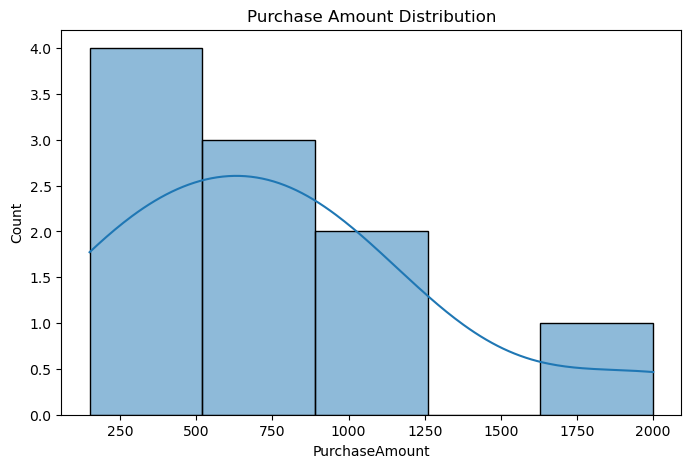

In [4]:
# Histogram of Purchase Amounts
plt.figure(figsize=(8,5))
sns.histplot(df['PurchaseAmount'], bins=5, kde=True)
plt.title('Purchase Amount Distribution')
plt.show()

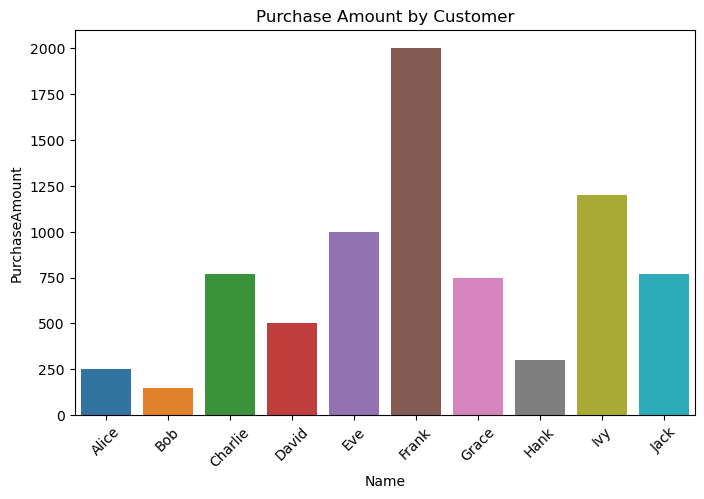

In [5]:
# Bar Plot of Purchases by Customer
plt.figure(figsize=(8,5))
sns.barplot(x=df['Name'], y=df['PurchaseAmount'])
plt.title('Purchase Amount by Customer')
plt.xticks(rotation=45)
plt.show()

## 🔎 Step 3: Data Filtering & Aggregation
We will filter data based on conditions and perform group-by operations.

In [6]:
# Filter customers with purchases above $500
high_value_customers = df[df['PurchaseAmount'] > 500]
high_value_customers

,CustomerID,Name,PurchaseAmount,JoinDate,Region
2,103,Charlie,768.75,2022-07-10,East
4,105,Eve,1000.00,NaT,North
5,106,Frank,2000.00,2023-02-10,South
6,107,Grace,750.00,2022-08-25,East
8,109,Ivy,1200.00,2023-06-30,North
9,110,Jack,768.75,2022-11-12,South


In [7]:
# Group by PurchaseAmount and count customers
df_grouped = df.groupby('PurchaseAmount').count()
df_grouped

,CustomerID,Name,JoinDate,Region
PurchaseAmount,,,,
150.00,1,1,1,1
250.00,1,1,1,1
300.00,1,1,1,1
500.00,1,1,1,1
750.00,1,1,1,1
768.75,2,2,2,2
1000.00,1,1,0,1
1200.00,1,1,1,1
2000.00,1,1,1,1
